In [359]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
import glob

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize = 40
markersize = 700

In [297]:
def replace_graph_names(df):
    df["Input Graph"] = df["Input Graph"].str.replace("com-", "", regex=True)\
                                    .str.replace(".gbbs.txt", "", regex=True)\
                                    .str.replace(".bin", "", regex=True)\
                                    .str.replace(".ungraph.txt", "", regex=True)\
                                    .str.replace(".graph.txt", "", regex=True)
    
    df["Input Graph"] = df["Input Graph"].str.replace("amazon", "AM", regex=True)\
                                    .str.replace("youtube", "YT", regex=True)\
                                    .str.replace("dblp", "DB", regex=True)\
                                    .str.replace("lj", "LJ", regex=True)\
                                    .str.replace("orkut", "OK", regex=True)\
                                    .str.replace("friendster", "FS", regex=True)
    
    df["Clusterer Name"] = df["Clusterer Name"].str.replace("Scan", "SCAN", regex=True)\
                                    .str.replace("Tectonic", "TECTONIC", regex=True)\
                                    .str.replace("Hac", "HAC", regex=True)\
                                    .str.replace("Clusterer", "", regex=True)\
                                    .str.replace("Parallel", "", regex=True)\
                                    .str.replace("Optimization", "", regex=True)
    
#     df["Clusterer Name"] = df["Clusterer Name"].str.replace("TigerGraph", "TG", regex=True)\
#                                     .str.replace("Neo4j", "NJ", regex=True)\
#                                     .str.replace("Louvain", "LV", regex=True)\
#                                     .str.replace("Leiden", "LD", regex=True)\
#                                     .str.replace("ModularityOptimization", "Mo", regex=True)\
#                                     .str.replace("Correlation", "Corr", regex=True)\
#                                     .str.replace("Modularity", "Mo", regex=True)\
#                                     .str.replace("NetworKit", "NK", regex=True)

In [298]:
base_addr = "/Users/sy/Desktop/MIT/clusterer/csv/"

In [418]:
csv_files = glob.glob(base_addr + "modularity_stats/*")
df = pd.concat([pd.read_csv(path, ) for path in csv_files])
df = df.fillna("[0.1]")
df['modularityObjective'] = df['modularityObjective'].str.strip('[]').astype(float)
df['correlationObjective'] = df['correlationObjective'].str.strip('[]').astype(float)

replace_graph_names(df)
df = df[df["Clusterer Name"]!="Correlation"]
df.reset_index(inplace=True)

graphs = df["Input Graph"].unique()
clusterers = df["Clusterer Name"].unique()


In [419]:
# sns.scatterplot(data=df[(df["Clusterer Name"]=="Correlation") & (df["Input Graph"]=="AM")],
#                x = "numberClusters", y = 'correlationObjective')
# plt.xscale("log")
# plt.yscale("symlog")

In [421]:
# Group by Input Graph and Clusterer Name, then find the row with maximum modularityObjective
max_modularity_indices = df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].groupby(['Input Graph', 'Clusterer Name'])['modularityObjective'].idxmax()

result = df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].loc[max_modularity_indices]

# Extract rows with maximum modularityObjective
result_sorted = result.sort_values(by=['Input Graph', 'modularityObjective'], ascending=[True, False])
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
# #                        'display.precision', 3,
#                        ):
# #     display(result_sorted[result_sorted["Input Graph"]=="LJ"] )
#     display(result_sorted)

In [422]:
df_max = df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].groupby(["Input Graph", "Clusterer Name"]).max() #'correlationObjective', 

In [423]:
def plot_modularity_method(ax, objective, name, graph, df_sub):
    df_sub.reset_index(names=['Clusterer Name'], inplace=True)
#     df_melted = df_sub.melt(id_vars='Clusterer Name', var_name='Objective', value_name='Value')
    sns.barplot(x=objective, y="Clusterer Name", data=df_sub, orient='h', ax= ax, color="gray")
    ax.set_xlabel(name, fontsize = fontsize)
    ax.set_ylabel("")
    
    ax.set_title(f"{graph}", fontsize = fontsize)
    if objective == "correlationObjective":
        ax.set_xscale("symlog")
        ax.set_xlim(-1e2, 0)
#         if graph != "FS":
#             ax.set_xticks([-1e12, -1e10, -1e8, -1e6, -1e4, -1e2, 0])
    set_ax_ticks(ax)
    
    
def plot_modularity_methods_compare(objective, name):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 16))
    axes_arr = axes.flatten()
    for i in range(len(graphs)):
        graph = graphs[i]
        df_sub = df_max.loc[graph]
        ax = axes_arr[i]
        plot_modularity_method(ax, objective, name, graph, df_sub)
    plt.subplots_adjust(wspace=0.7, hspace=0.5)  # Adjust the value as needed

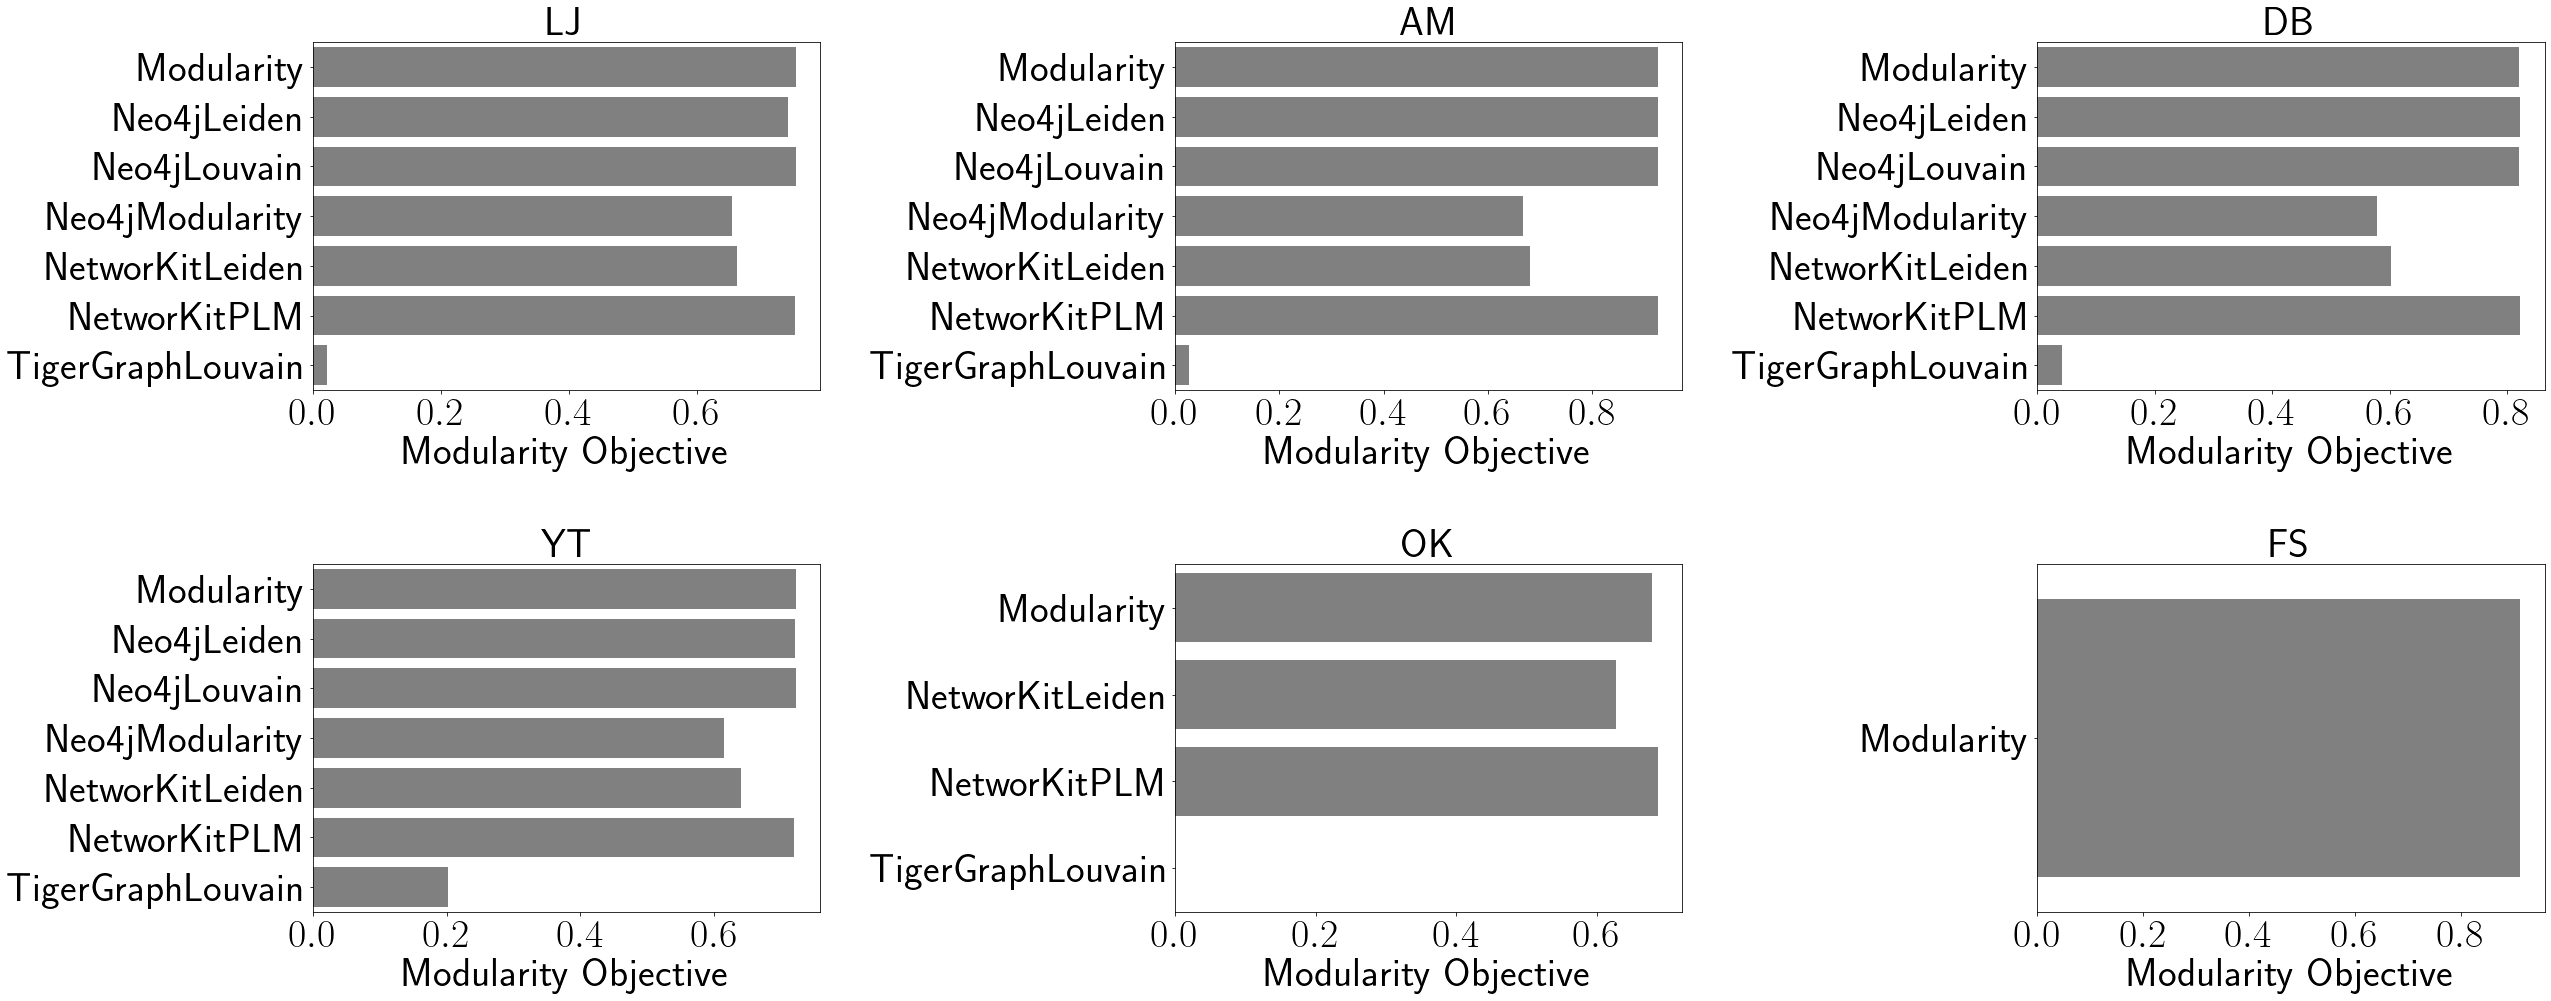

In [424]:
objective = "modularityObjective"
name = 'Modularity Objective'
plot_modularity_methods_compare(objective, name)
plt.savefig("../results/modularity_scores_all.pdf")

In [417]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# graph = "LJ"
# df_sub = df_max.loc[graph]
# plot_modularity_method(ax, objective, name, graph, df_sub)
# plt.tight_layout()
# plt.savefig("../results/modularity_scores_lj.pdf")

In [416]:
print(df_sub.sort_values(by="modularityObjective", ascending=False)[["Clusterer Name", "modularityObjective"]].to_latex())

\begin{tabular}{llr}
\toprule
 & Clusterer Name & modularityObjective \\
\midrule
1 & Modularity & 0.755035 \\
3 & Neo4jLouvain & 0.754733 \\
6 & NetworKitPLM & 0.753670 \\
2 & Neo4jLeiden & 0.743583 \\
0 & Correlation & 0.686646 \\
5 & NetworKitLeiden & 0.662478 \\
4 & Neo4jModularity & 0.654594 \\
7 & TigerGraphLouvain & 0.022660 \\
\bottomrule
\end{tabular}



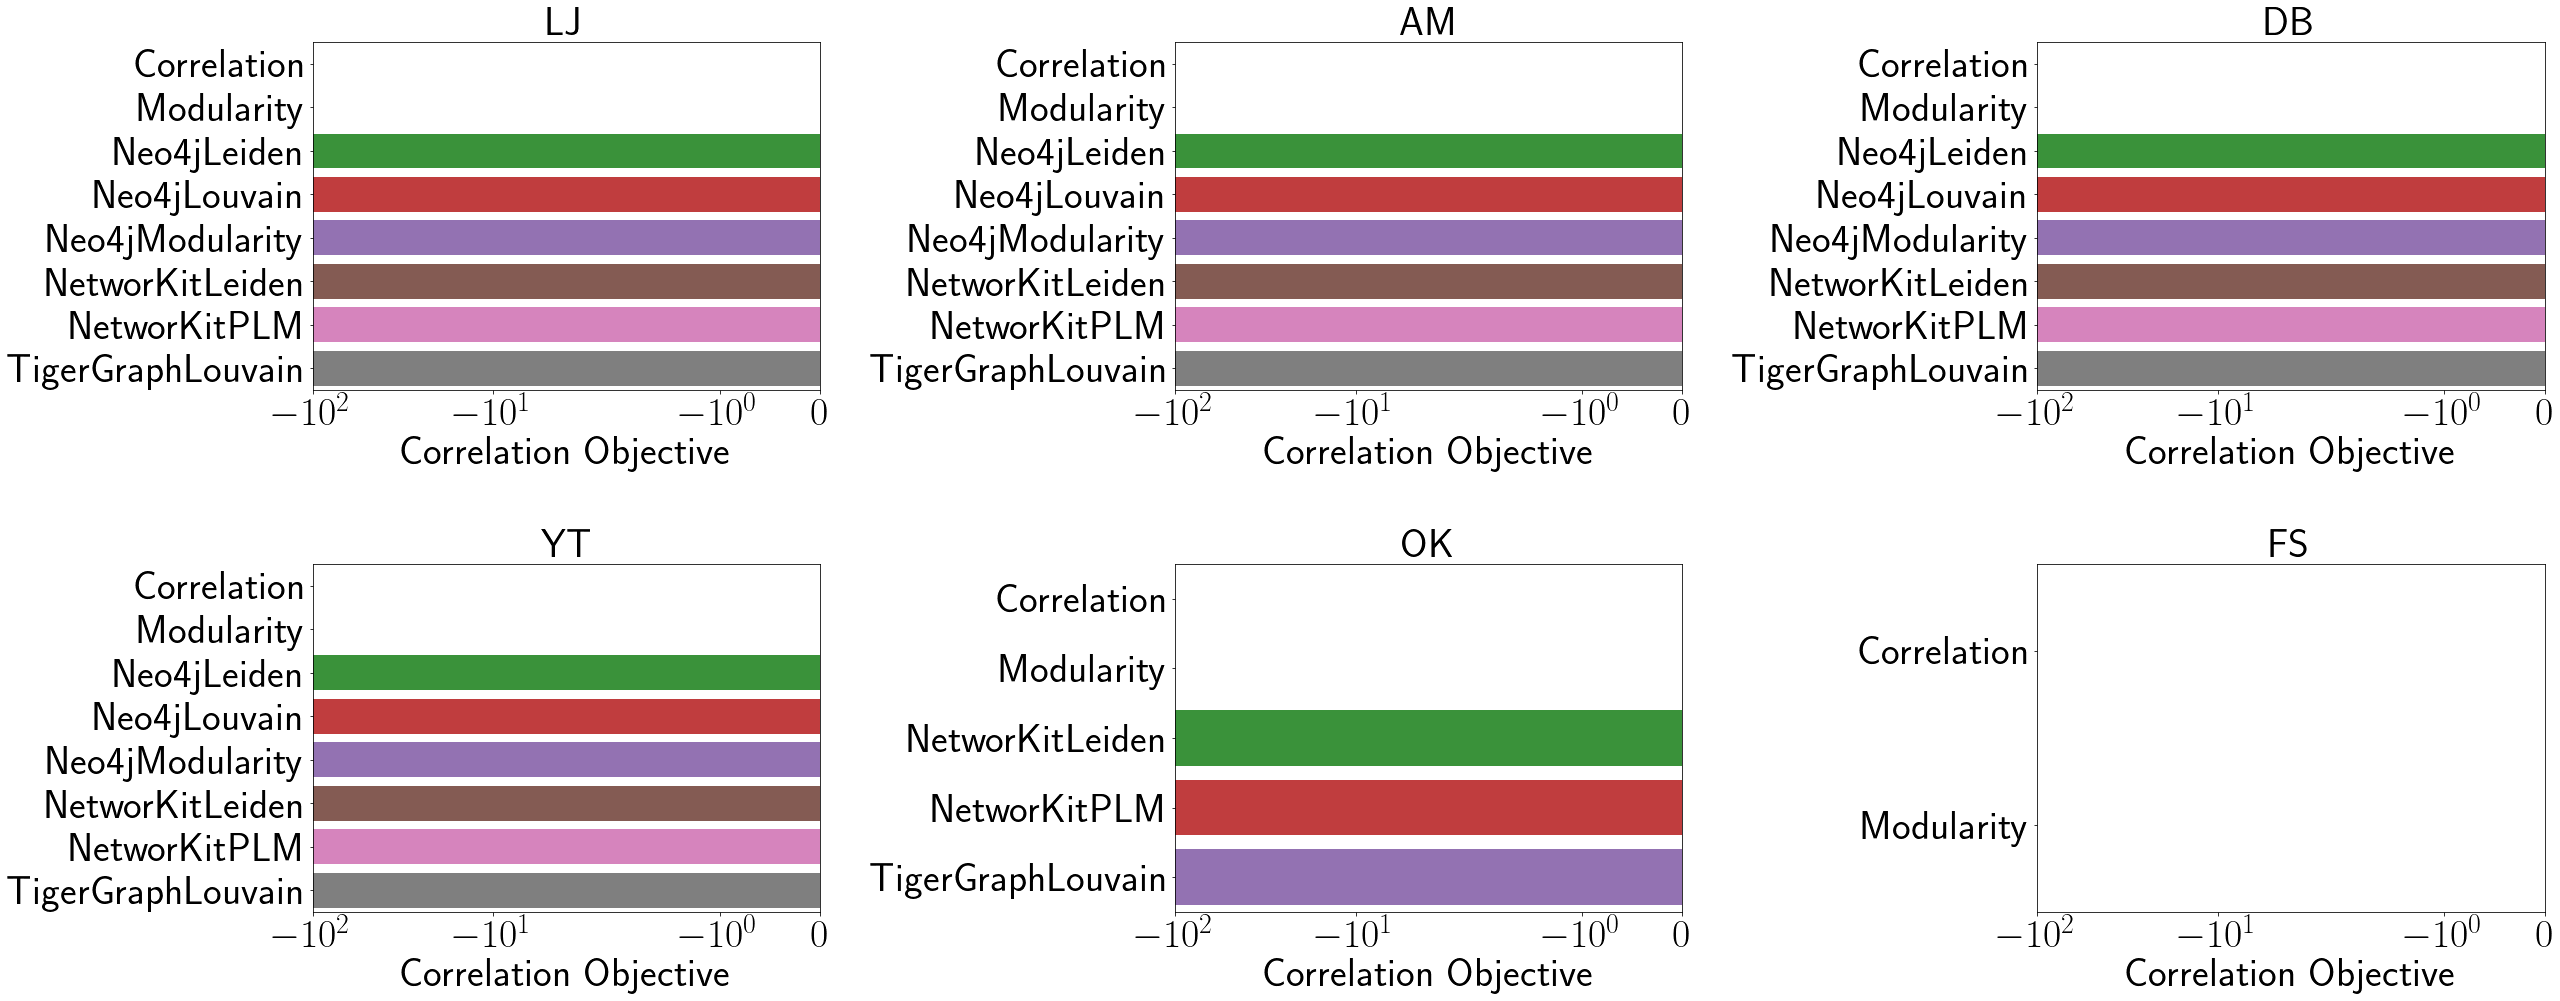

In [328]:
objective = "correlationObjective"
name = 'Correlation Objective'
plot_modularity_methods_compare(objective, name)

## plot against f score

In [342]:
csv_files = glob.glob(base_addr + "modularity_stats/*")
df = pd.concat([pd.read_csv(path, ) for path in csv_files])
df = df.fillna("[0.1]")
df['modularityObjective'] = df['modularityObjective'].str.strip('[]').astype(float)
df['correlationObjective'] = 1 * df['correlationObjective'].str.strip('[]').astype(float)
replace_graph_names(df)
df = df[df["Clusterer Name"].isin(["Moularity", "Correlation" ])] #
graphs = df["Input Graph"].unique()


df2 = pd.read_csv(base_addr + "snap_results/stats_snap_mod.csv")[["Input Graph", 
                                                                 "Clusterer Name", "Config", 'fScore_mean']]
replace_graph_names(df2)
df2 = df2[df2["Clusterer Name"].isin(["Correlation", "Modularity"])]


df.set_index(["Input Graph", "Clusterer Name", "Config"], inplace=True)
df2.set_index(["Input Graph", "Clusterer Name", "Config"], inplace=True)

df_all = df.join(df2, on=["Input Graph", "Clusterer Name", "Config"], how="inner")

In [356]:
def set_ax_ticks(ax):
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
def plot_ax(ax, xaxis, yaxis, xlabel, ylabel, df_sub, graph):
    sns.scatterplot(data = df_sub, 
         x=xaxis,
         y=yaxis,
         s = markersize, 
         ax = ax)
    ax.set_title(f"{graph}", fontsize = fontsize)
    if xaxis == 'correlationObjective':
        ax.set_xscale("symlog")  
        current_xlim = ax.get_xlim()
        ax.set_xlim(left=current_xlim[0], right=1)
        ax.set_xticks([-1e14, -1e12, -1e10, -1e8, -1e6, -1e4, -1e2, 0])
    ax.set_ylabel(ylabel, fontsize = fontsize)
    ax.set_xlabel(xlabel, fontsize = fontsize)
    set_ax_ticks(ax)
    
    
def plotObjectives(xaxis, yaxis, xlabel, ylabel):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 16))
    axes_arr = axes.flatten()
    for i in range(len(graphs)):
        ax = axes_arr[i]
        graph = graphs[i]
        df_sub = df_all.loc[graph]
        plot_ax(ax, xaxis, yaxis, xlabel, ylabel, df_sub, graph)
                        
        
    plt.subplots_adjust(hspace=0.3)  # Adjust the value as needed


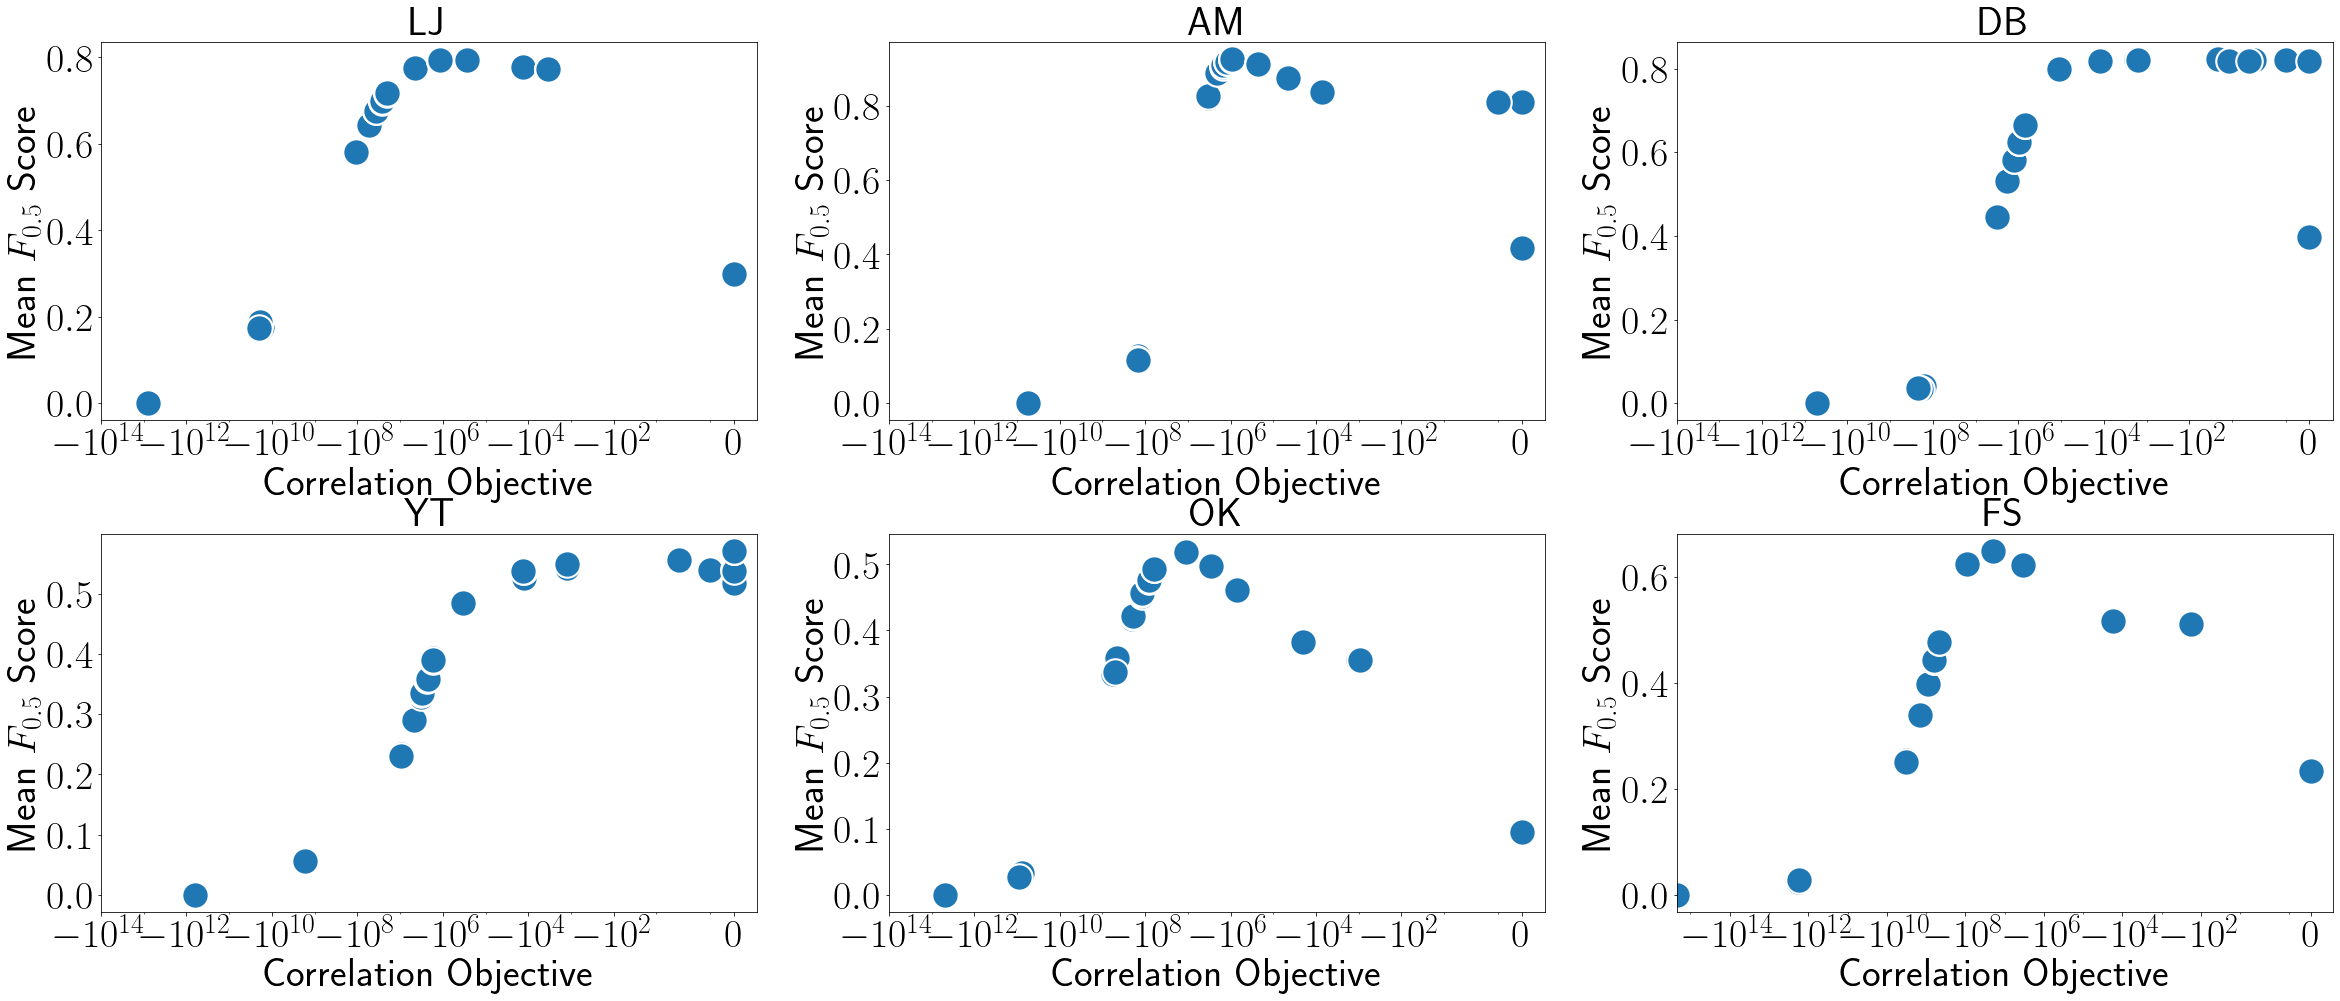

In [357]:
xaxis = 'correlationObjective'
yaxis = "fScore_mean"
plotObjectives(xaxis, yaxis, "Correlation Objective", "Mean $F_{0.5}$ Score")
plt.savefig("../results/objective_corr_f.pdf", bbox_inches='tight')

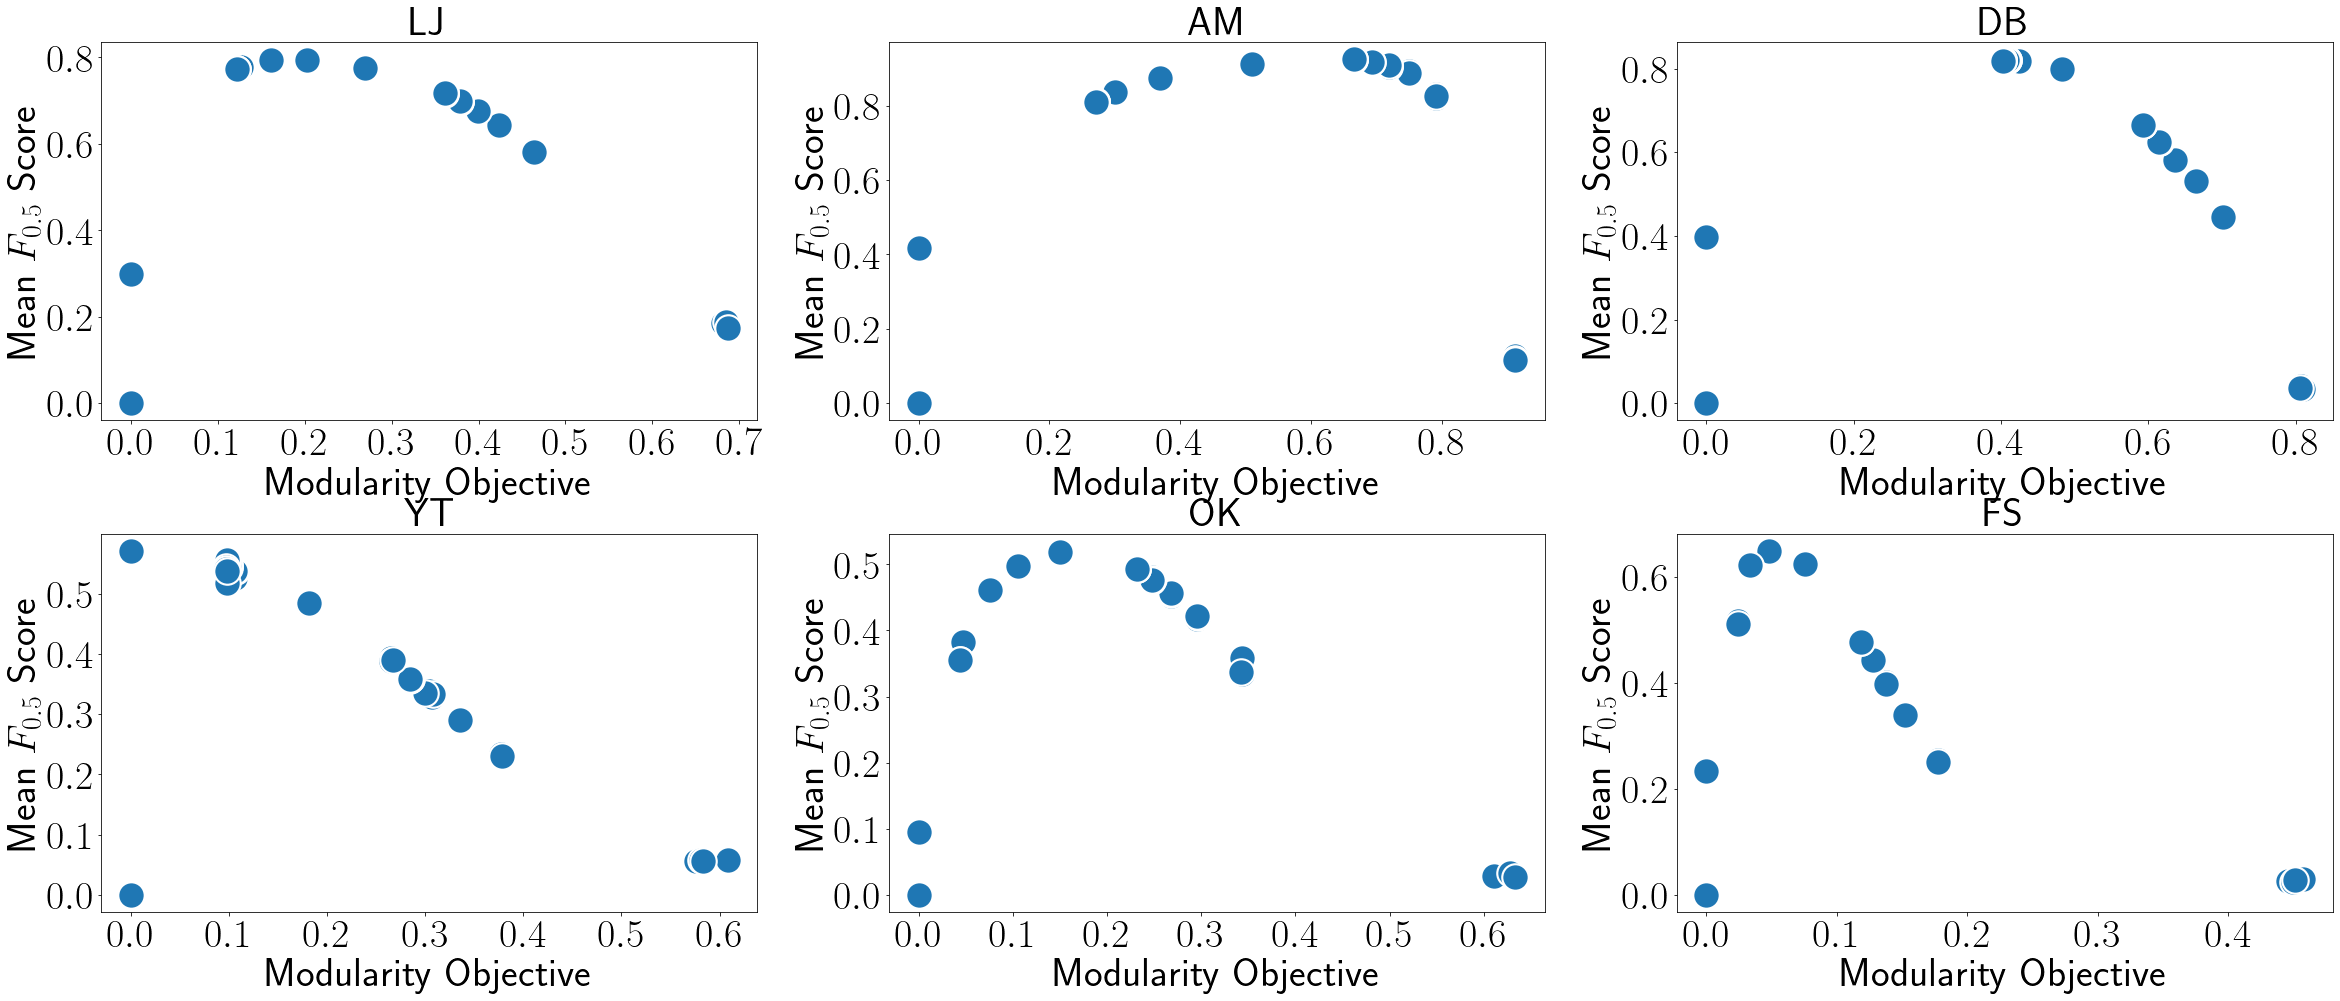

In [345]:
xaxis = 'modularityObjective'
yaxis = "fScore_mean"
plotObjectives(xaxis, yaxis, "Modularity Objective", "Mean $F_{0.5}$ Score")
plt.savefig("../results/objective_mod_f.pdf", bbox_inches='tight')

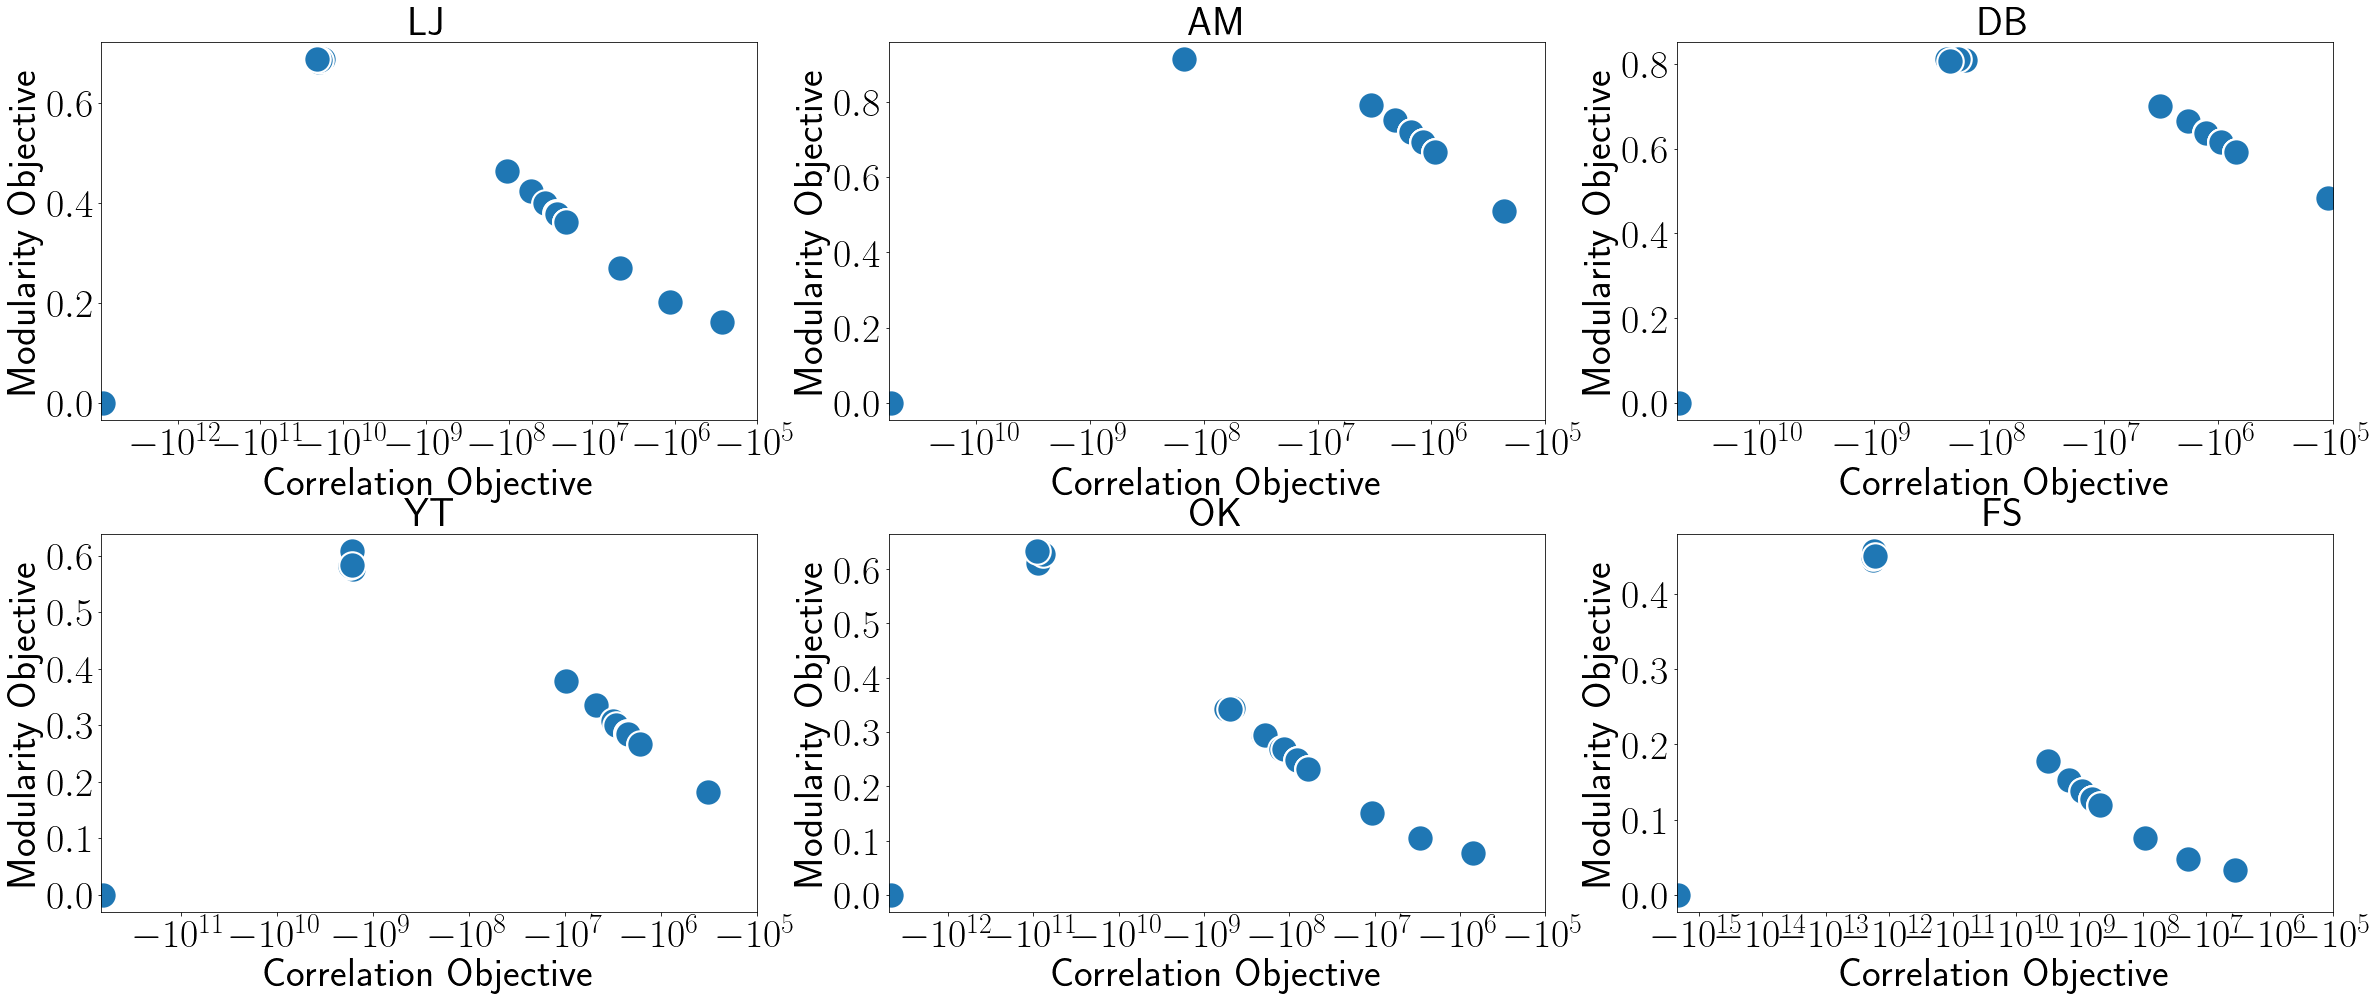

In [346]:
xaxis = 'correlationObjective'
yaxis = 'modularityObjective'
plotObjectives(xaxis, yaxis, "Correlation Objective", "Modularity Objective", )
plt.savefig("../results/objective_corr_mod.pdf", bbox_inches='tight')

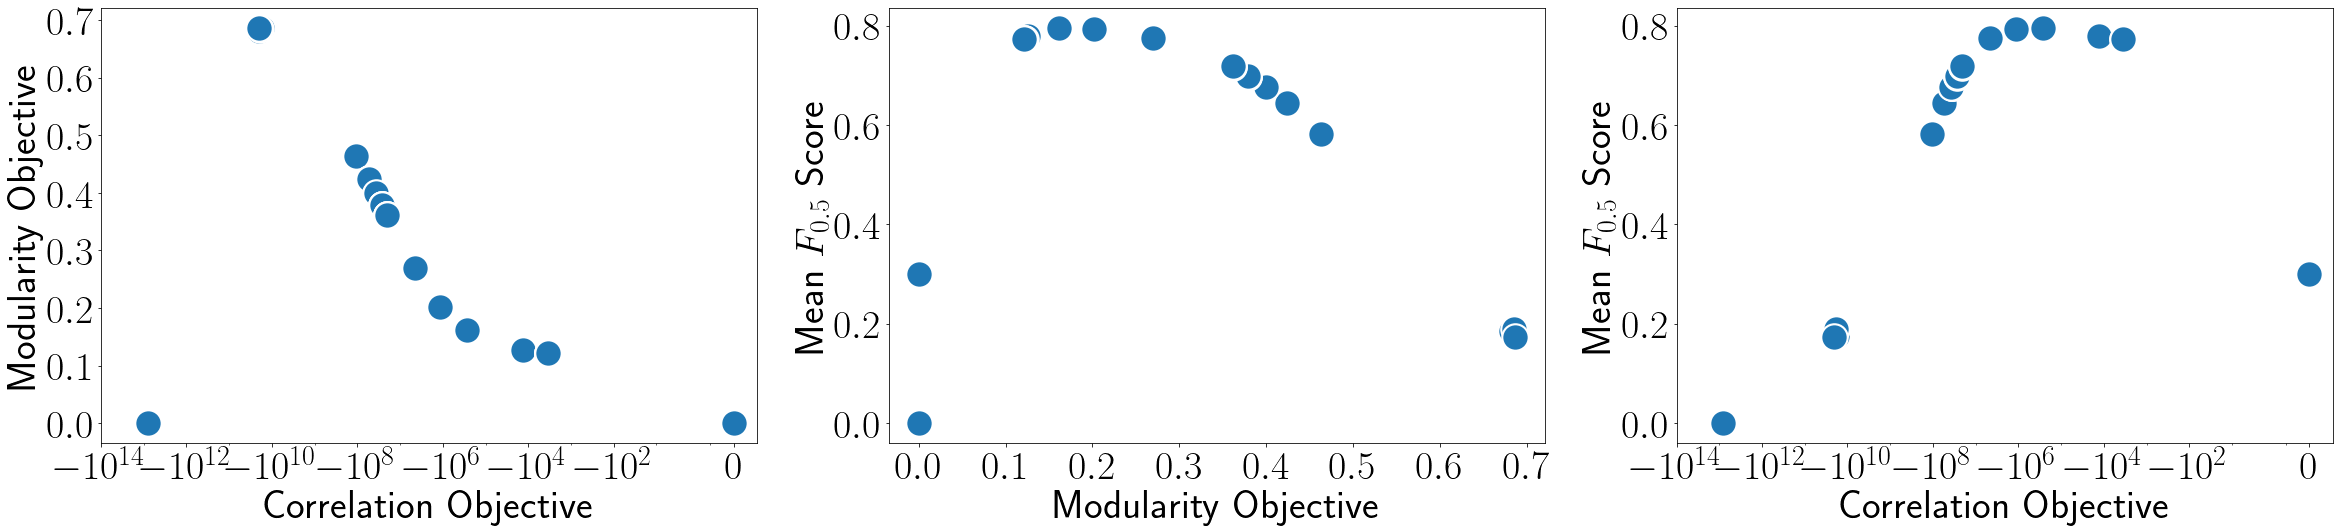

In [358]:

graph = "LJ"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 8))
df_sub = df_all.loc[graph]

xaxis = 'correlationObjective'
yaxis = 'modularityObjective'
xlabel = "Correlation Objective"
ylabel = "Modularity Objective"
plot_ax(axes[0], xaxis, yaxis, xlabel, ylabel, df_sub, graph)        

xaxis = 'modularityObjective'
yaxis = "fScore_mean"
xlabel = "Modularity Objective"
ylabel = "Mean $F_{0.5}$ Score"
plot_ax(axes[1], xaxis, yaxis, xlabel, ylabel, df_sub, graph)     

xaxis = 'correlationObjective'
yaxis = "fScore_mean"
xlabel = "Correlation Objective"
ylabel = "Mean $F_{0.5}$ Score"
plot_ax(axes[2], xaxis, yaxis, xlabel, ylabel, df_sub, graph)    

for ax in axes:
    ax.set_title("")

plt.savefig("../results/objective_all.pdf", bbox_inches='tight')    